In [64]:
import glob

dataset_dir = '/home/himoza/Учеба/Praktik/luna16'
mhd_list = glob.glob(dataset_dir + '/subset*/subset*/*.mhd')

In [ ]:
len(mhd_list)

445

: 

In [ ]:
import os

presentOnDisk_set = {os.path.split(p)[-1][:-4] for p in mhd_list}

: 

In [ ]:
len(presentOnDisk_set)

445

: 

In [ ]:
import csv

annotationCenter_xyz = ''

with open(dataset_dir + '/annotations.csv', 'r') as f:
    row = list(csv.reader(f))[1]
    series_uid = row[0]
    annotationCenter_xyz = tuple(float(x) for x in row[1:4])

annotationCenter_xyz

(-128.6994211, -175.3192718, -298.3875064)

: 

In [ ]:
diameter_dict = {}
with open(dataset_dir + '/annotations.csv', 'r') as f:
    for row in list(csv.reader(f))[1:]:
        series_uid = row[0]
        annotationCenter_xyz = tuple(float(x) for x in row[1:4])
        annotationDiameter_mm = float(row[4])
        
        diameter_dict.setdefault(series_uid, []).append(
            (annotationCenter_xyz, annotationDiameter_mm)
        )

: 

In [ ]:
for key in diameter_dict.keys():
    if len(diameter_dict[key]) > 1:
        print(key)

1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860
1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405
1.3.6.1.4.1.14519.5.2.1.6279.6001.106379658920626694402549886949
1.3.6.1.4.1.14519.5.2.1.6279.6001.107351566259572521472765997306
1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059
1.3.6.1.4.1.14519.5.2.1.6279.6001.111258527162678142285870245028
1.3.6.1.4.1.14519.5.2.1.6279.6001.111496024928645603833332252962
1.3.6.1.4.1.14519.5.2.1.6279.6001.112740418331256326754121315800
1.3.6.1.4.1.14519.5.2.1.6279.6001.112767175295249119452142211437
1.3.6.1.4.1.14519.5.2.1.6279.6001.113679818447732724990336702075
1.3.6.1.4.1.14519.5.2.1.6279.6001.114218724025049818743426522343
1.3.6.1.4.1.14519.5.2.1.6279.6001.114249388265341701207347458535
1.3.6.1.4.1.14519.5.2.1.6279.6001.114914167428485563471327801935
1.3.6.1.4.1.14519.5.2.1.6279.6001.117040183261056772902616195387
1.3.6.1.4.1.14519.5.2.1.6279.6001.118140393257625250121502185026
1.3.6.1.4.1.14519.5.2.1.6

: 

In [ ]:
from collections import namedtuple

CandidateInfoTuple = namedtuple(
    'CandidateInfoTuple',
    'isNodule_bool, diameter_mm, series_uid, center_xyz',
)

: 

In [ ]:
import functools

@functools.lru_cache(1)
def getCandidateInfoList(requireOnDisk_bool=True):
    dataset_dir = '/home/himoza/Учеба/Praktik/luna16'
    mhd_list = glob.glob(dataset_dir + '/subset*/subset*/*.mhd')
    presentOnDisk_set = {os.path.split(p)[-1][:-4] for p in mhd_list}

    diameter_dict = {}
    with open(dataset_dir + '/annotations.csv', 'r') as f:
        for row in list(csv.reader(f))[1:]:
            series_uid = row[0]
            annotationCenter_xyz = tuple(float(x) for x in row[1:4])
            annotationDiameter_mm = float(row[4])

            diameter_dict.setdefault(series_uid, []).append(
                (annotationCenter_xyz, annotationDiameter_mm)
            )

    candidateInfo_list = []
    with open(dataset_dir + '/candidates.csv', 'r') as f:
        for row in list(csv.reader(f))[1:]:
            series_uid = row[0]

            if series_uid not in presentOnDisk_set and requireOnDisk_bool:
                continue

            isNodule_bool = bool(int(row[4]))
            candidateCenter_xyz = tuple(float(x) for x in row[1:4])
            candidateDiameter_mm = 0
            for annotation_tup in diameter_dict.get(series_uid, []):
                annotationCenter_xyz, annotationDiameter_mm = annotation_tup
                for i in range(3):
                    delta_mm = abs(candidateCenter_xyz[i] - annotationCenter_xyz[i])
                    if delta_mm > annotationDiameter_mm:
                        break
                else:
                    candidateDiameter_mm = annotationDiameter_mm
                    break
            candidateInfo_list.append(CandidateInfoTuple(
                isNodule_bool,
                candidateDiameter_mm,
                series_uid,
                candidateCenter_xyz
            ))
    return candidateInfo_list

: 

In [ ]:
count = 0

for i in getCandidateInfoList():
    if i.series_uid == '1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405' and i.isNodule_bool:
        print(i)

CandidateInfoTuple(isNodule_bool=True, diameter_mm=16.38127631, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(89.32, 190.84, -516.82))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.20857028, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(94.93, 153.03, -429.91))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.54514997, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(8.8, 174.74, -401.87))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=16.38127631, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(88.87249423, 197.6836731, -514.3939557))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=18.54514997, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405', center_xyz=(2.019565949, 172.5930677, -405.0528932))
CandidateInfoTuple(isNodule_bool=True, diameter_mm=8.143261683, series

: 

In [ ]:
diameter_dict['1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016233746780170740405']

[((-24.0138242, 192.1024053, -391.0812764), 8.143261683),
 ((2.441546798, 172.4648812, -405.4937318), 18.54514997),
 ((90.93171321, 149.0272657, -426.5447146), 18.20857028),
 ((89.54076865, 196.4051593, -515.0733216), 16.38127631)]

: 

In [ ]:
for i in presentOnDisk_set:
    if '100225287222365663678666836860' in i:
        print(1)

: 

In [ ]:
'1234'[-4:]

'1234'

: 

In [ ]:
import SimpleITK as sitk
import numpy as np

: 

In [ ]:
DATASET_DIR = '/home/himoza/Учеба/Praktik/luna16'

: 

In [ ]:
mhd_path = glob.glob(
            DATASET_DIR + f'/subset*/subset*/{series_uid}.mhd'
        )

: 

In [ ]:
np_scan = np.array(sitk.GetArrayFromImage(sitk.ReadImage(mhd_path[0])))
np_scan.shape

(321, 512, 512)

: 

In [ ]:
import matplotlib.pyplot as plt

: 

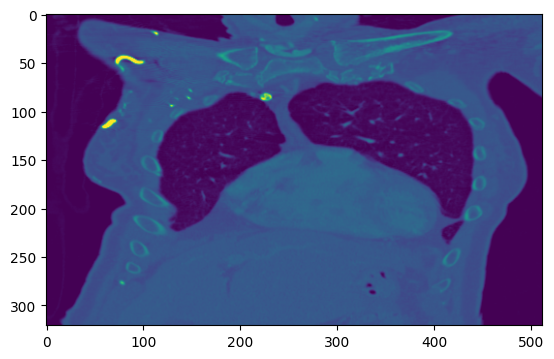

: 

In [ ]:
plt.imshow(np_scan[::-1,190,:], colorizer='gray')

In [ ]:
np_scan[150,:,:]

array([[ -985,  -989,  -986, ..., -1000,  -984,  -987],
       [-1000,  -993,  -979, ...,  -999,  -984,  -990],
       [-1000, -1000,  -994, ...,  -991,  -983,  -990],
       ...,
       [ -983,  -960,  -949, ...,  -950,  -945,  -934],
       [ -973,  -970,  -981, ...,  -941,  -943,  -929],
       [ -965,  -955,  -975, ...,  -947,  -929,  -915]],
      shape=(512, 512), dtype=int16)

: 

In [ ]:
ct_mhd = sitk.ReadImage(mhd_path[0])

: 

In [ ]:
ct_mhd.GetOrigin()

(-120.049467, 9.48041606, -657.0)

: 

In [ ]:
ct_mhd.GetSpacing()

(0.556640625, 0.556640625, 1.0)

: 

In [ ]:
ct_mhd.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

: 

In [ ]:
[1, 2, 3, 4, 5, 6, 7, 8, 9][slice(0, 5)]

[1, 2, 3, 4, 5]

: 

In [ ]:
import torch

: 

In [ ]:
torch.cuda.is_available()

True

: 

In [ ]:
import gzip

from cassandra.cqltypes import BytesType
from diskcache import FanoutCache, Disk
from io import BytesIO
from diskcache.core import MODE_BINARY

: 

In [8]:
from src.data.dataset import getCandidateInfoList, getCt, LunaDataset

In [9]:
candidateInfo_list = getCandidateInfoList(requireOnDisk_bool=True)
positiveInfo_list = [x for x in candidateInfo_list if x[0]]
diameter_list = [x[1] for x in positiveInfo_list]

In [ ]:
for i in range(0, len(diameter_list), 100):
    print(f'{i:4} {diameter_list[i]:4.1f} mm')

   0 32.3 mm
 100 13.8 mm
 200  8.6 mm
 300  6.7 mm
 400  5.5 mm
 500  4.4 mm
 600  0.0 mm
 700  0.0 mm


: 

In [ ]:
data = LunaDataset(10, False)

: 

: 

: 

In [14]:
%matplotlib inline

In [ ]:
from src.util.vis import findPositiveSamples, showCandidate

In [16]:
noduleSample_list = findPositiveSamples()

0 CandidateInfoTuple(isNodule_bool=True, diameter_mm=32.27003025, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886', center_xyz=(67.61451718, 85.02525992, -109.8084416))
1 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.44242293, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.943403138251347598519939390311', center_xyz=(-45.29440163, 74.86925386, -97.52812481))
2 CandidateInfoTuple(isNodule_bool=True, diameter_mm=27.07544345, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.481278873893653517789960724156', center_xyz=(-102.571208, -5.186558766, -205.1033412))
3 CandidateInfoTuple(isNodule_bool=True, diameter_mm=25.23320204, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273', center_xyz=(63.4740118048, 73.9174523314, -213.736128767))
4 CandidateInfoTuple(isNodule_bool=True, diameter_mm=24.77327957, series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.146987333806092287055399155268', center_xyz=(97.3540746077, -16.7922286632, -263.6599083

In [17]:
series_uid = positiveInfo_list[3][2]

In [18]:
series_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273'

1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273 0 False [0, 1, 2, 3, 4]


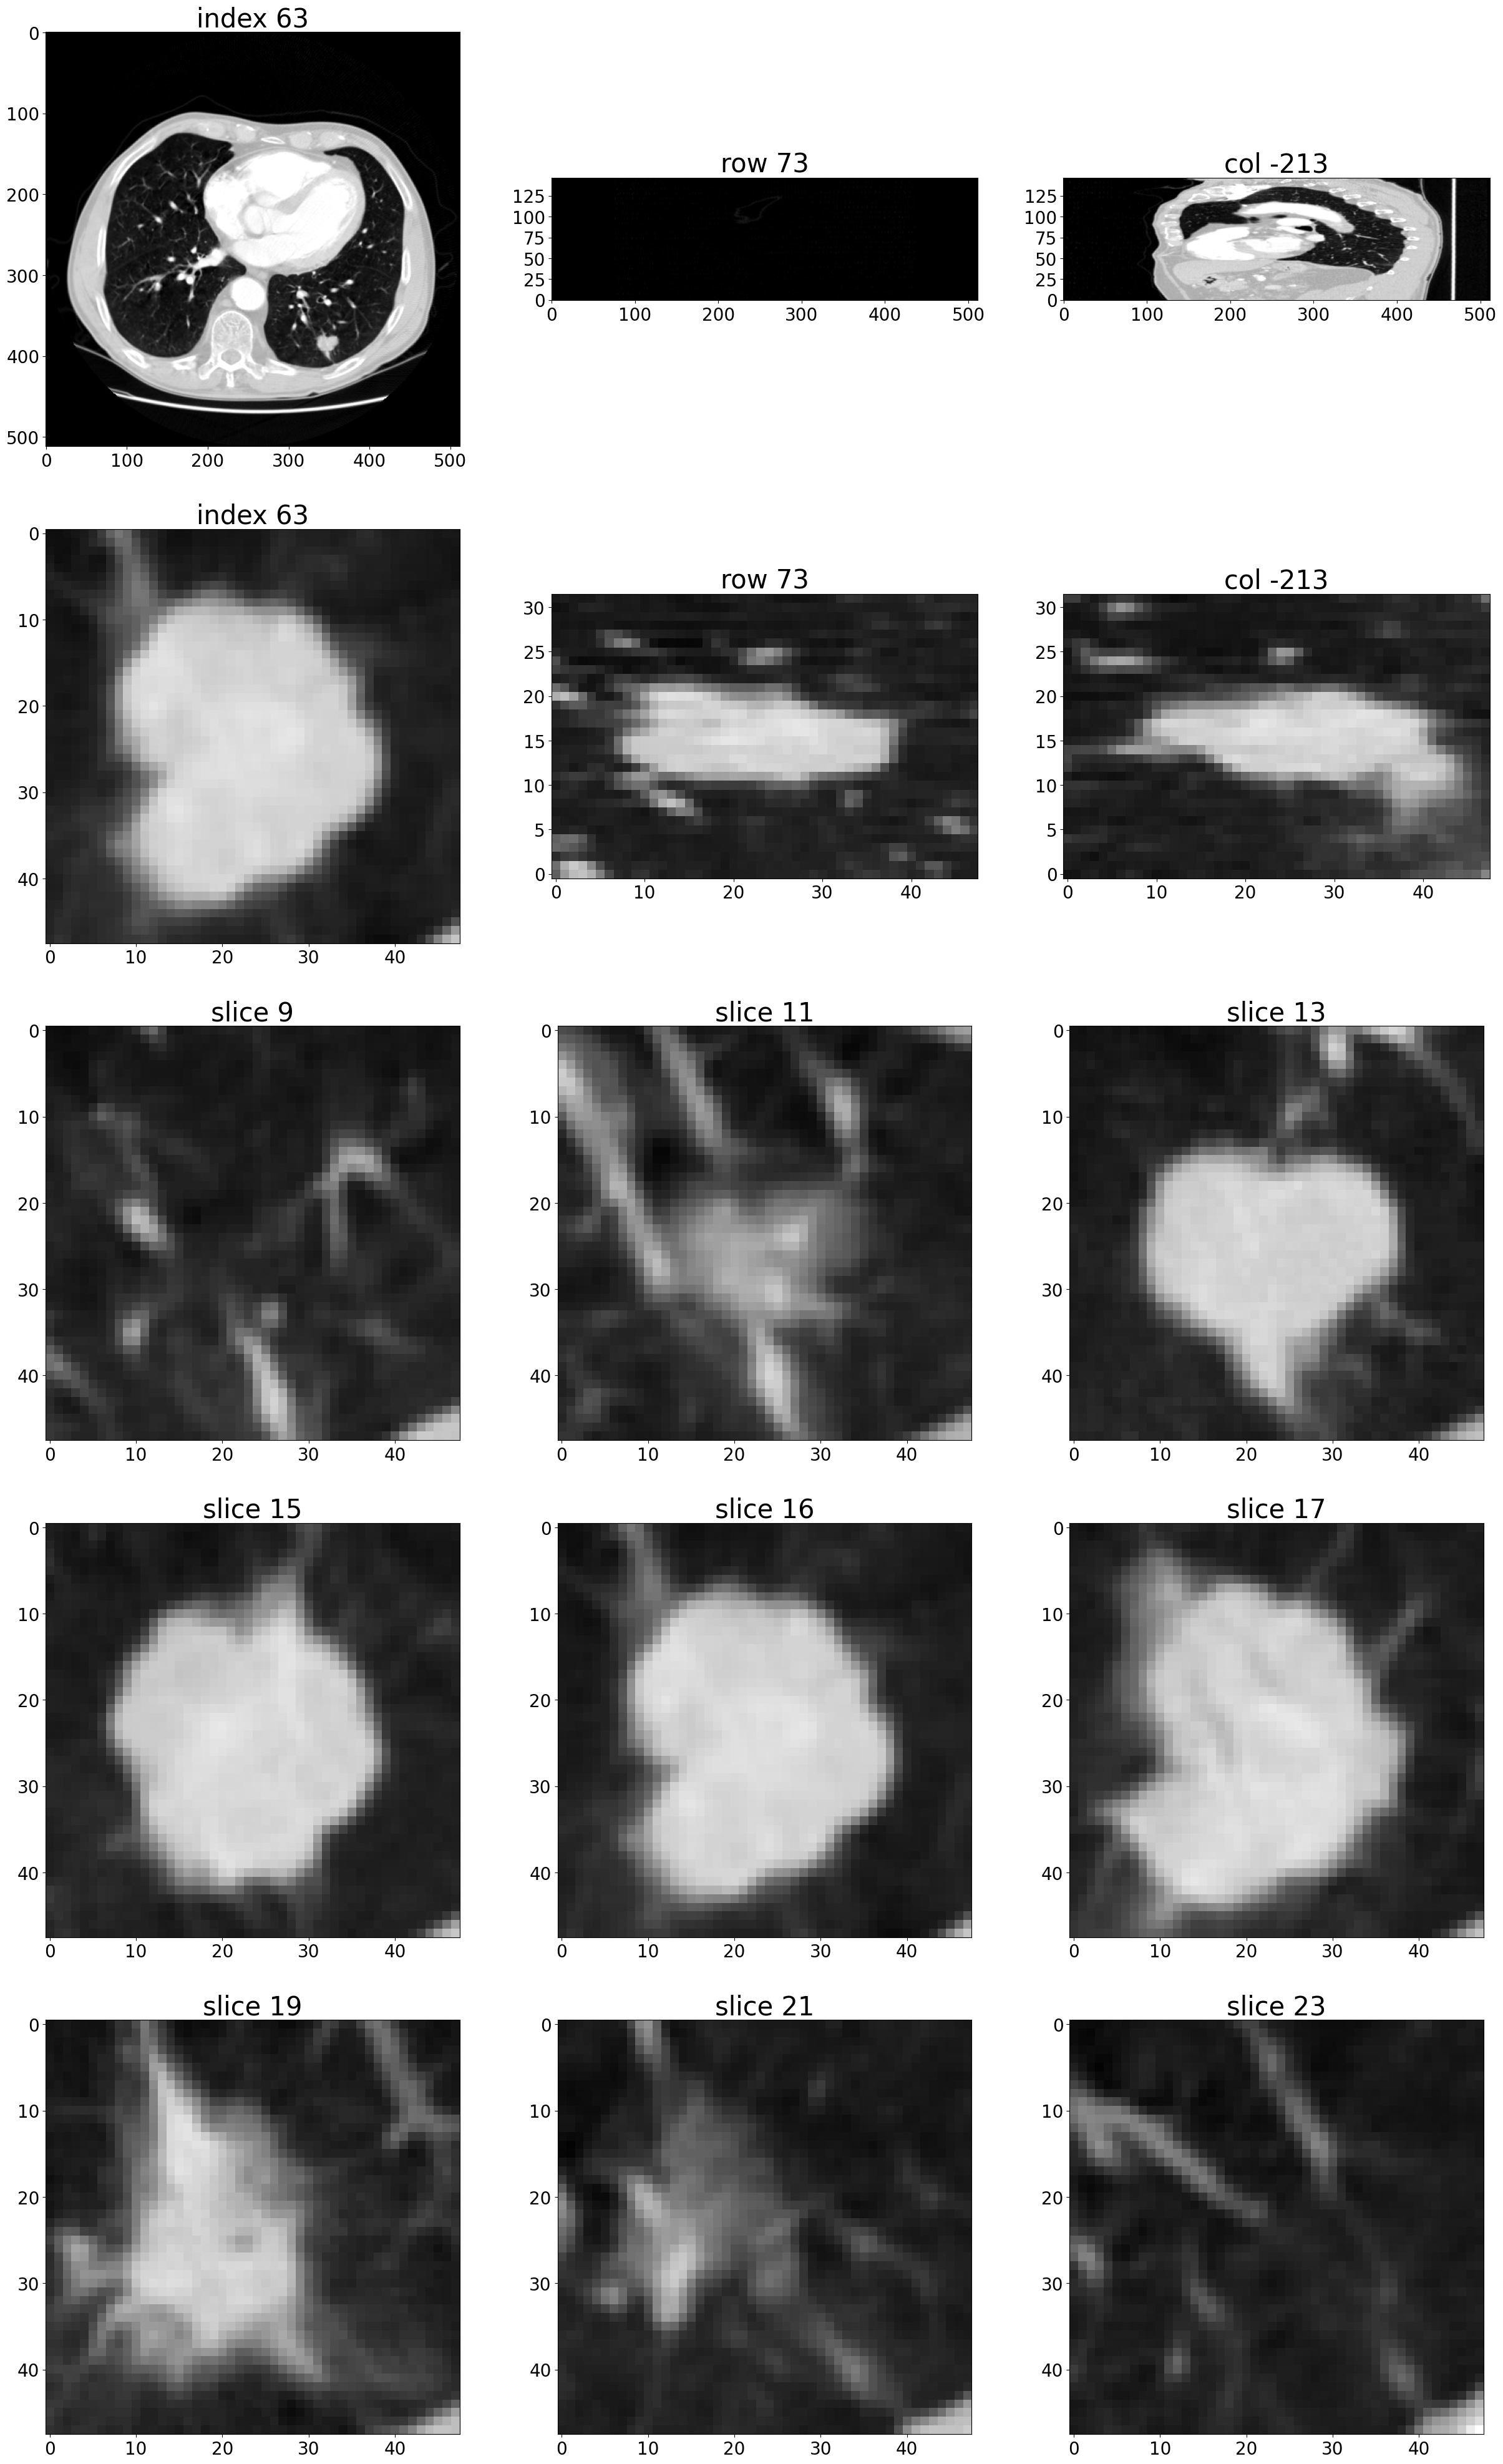

In [19]:
showCandidate(series_uid=series_uid)

In [65]:
DATASET_DIR = '/home/himoza/Учеба/Praktik/luna16'

In [67]:
mhd_path = glob.glob(
      DATASET_DIR + f'/subset*/subset*/{series_uid}.mhd'
  )

In [68]:
mhd_path

[]

In [76]:
series_uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.183982839679953938397312236359'

In [3]:
from src.data.dataset import LunaDataset

ModuleNotFoundError: No module named 'util'

In [39]:
data = LunaDataset(series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.487745546557477250336016826588')

In [5]:
candidate_t, pos_t, _, _ = data[0]

In [8]:
data[0][3]

tensor([ 52.1800, -21.0200, -81.1600])

In [12]:
showCandidate(series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.511347030803753100045216493273')

IndexError: index 16 is out of bounds for axis 0 with size 16

In [21]:
import torch

In [36]:
tens = torch.randint(1, 10, (3, 1, 42, 42, 42)).to(torch.float32)

In [37]:
tens.shape

torch.Size([3, 1, 42, 42, 42])

In [38]:
conv1 = torch.nn.Conv3d(1, 32, 3, padding=1)

In [39]:
res = conv1(tens)

In [40]:
res.shape

torch.Size([3, 32, 42, 42, 42])

In [41]:
torch.flatten(res, 1).shape

torch.Size([3, 2370816])

In [ ]:
dl = torch.utils.data.DataLoader(LunaDataset(), 64)

In [ ]:
len(dl.dataset)

4303

In [1]:
import torch

In [12]:
metrics = torch.tensor([[1, 0, 1],
                        [0.8, 0.3, 1],
                        [1, 1, 1],])

In [13]:
negLabel_mask = metrics[1] <= 0.5

In [14]:
negLabel_mask

tensor([False,  True, False])

In [11]:
metrics.shape

torch.Size([4, 3])

In [9]:
from data.dataset import LunaDataset
from torch.utils.data import DataLoader
import torch

In [ ]:
val_ds = LunaDataset()

batch_size = 4

val_dl = DataLoader(
    val_ds,
    batch_size=batch_size,
    num_workers=4,
)

In [3]:
from util.util import enumerateWithEstimate
en = enumerateWithEstimate(val_dl, "E1 Training", start_ndx=val_dl.num_workers)

for ind, val in en:
    continue

2025-11-02 16:30:06,795 WARNING  pid:20663     util.util:054:enumerateWithEstimate E1 Training ----/68840, starting
2025-11-02 16:30:07,017 INFO     pid:20663     util.util:071:enumerateWithEstimate E1 Training   32/68840, done at 2025-11-02 16:33:36, 0:03:29
2025-11-02 16:30:07,626 INFO     pid:20663     util.util:071:enumerateWithEstimate E1 Training  256/68840, done at 2025-11-02 16:33:16, 0:03:09
2025-11-02 16:30:13,016 INFO     pid:20663     util.util:071:enumerateWithEstimate E1 Training 2048/68840, done at 2025-11-02 16:33:31, 0:03:24
2025-11-02 16:31:22,826 INFO     pid:20663     util.util:071:enumerateWithEstimate E1 Training 16384/68840, done at 2025-11-02 16:35:25, 0:05:18
2025-11-02 16:43:57,286 WARNING  pid:20663     util.util:084:enumerateWithEstimate E1 Training ----/68840, done at 2025-11-02 16:43:57


In [2]:
from training import LunaTrainingApp
from scripts.prepcache import LunaPrepCacheApp

In [3]:
lunaModel = LunaTrainingApp(['--num-workers=6', '--epoch=5', '--batch-size=256', '--balanced', '--augmented'])

2025-11-05 15:34:41,853 INFO     pid:25038     training:139:initModel Using CUDA; 1 devices.


In [4]:
lunaModel.main()

2025-11-05 15:34:45,430 INFO     pid:25038     training:203:main Starting LunaTrainingApp, Namespace(num_workers=6, batch_size=256, epochs=5, balanced=True, augmented=True, augment_flip=False, augment_offset=False, augment_scale=False, augment_rotate=False, augment_noise=False, tb_prefix='p2ch11', comment='dwlpt')
2025-11-05 15:34:47,046 INFO     pid:25038     training:208:main Epoch 1 of 5, 391/108 batches of size 256*1
2025-11-05 15:34:47,141 WARNING  pid:25038     util.util:054:enumerateWithEstimate E1 Training ----/391, starting
2025-11-05 15:35:28,302 INFO     pid:25038     util.util:071:enumerateWithEstimate E1 Training   64/391, done at 2025-11-05 15:38:58, 0:04:08
2025-11-05 15:37:37,744 INFO     pid:25038     util.util:071:enumerateWithEstimate E1 Training  256/391, done at 2025-11-05 15:39:07, 0:04:16
2025-11-05 15:39:10,097 WARNING  pid:25038     util.util:084:enumerateWithEstimate E1 Training ----/391, done at 2025-11-05 15:39:10
2025-11-05 15:39:13,821 INFO     pid:25038  

In [9]:
data = LunaDataset(series_uid='1.3.6.1.4.1.14519.5.2.1.6279.6001.121993590721161347818774929286')

In [ ]:
lunaModel_test = LunaTrainingApp(['--num-workers=4', '--epoch=3', '--batch-size=256', '--balanced=True'])

2025-11-04 13:03:52,796 INFO     pid:6275     training:082:initModel Using CUDA; 1 devices.


In [17]:
noduleSample_list = findPositiveSamples(limit=1000)

In [18]:
from util.vis import findPositiveSamples, showCandidate
count_neg = 0
count_pos = 0

for candidate_tup in noduleSample_list:
    data = LunaDataset(series_uid=candidate_tup[2])
    if int(torch.argmax(lunaModel.model(data[0][0].unsqueeze(0).to(lunaModel.device))[1])):
        count_pos += 1
    else:
        count_neg += 1

In [14]:
data[0][0].unsqueeze(0).shape

torch.Size([1, 1, 32, 48, 48])

In [22]:
transform_t = torch.eye(4)


In [7]:
from data.dataset import LunaDataset

In [2]:
luna = LunaDataset(ratio_int=2)

In [10]:
counter = 0
for i in luna:
    print(i[1])
    counter += 1
    if counter == 10:
        break

2025-11-05 00:21:46,980 INFO     pid:26629     data.dataset:192:__getitem__ 0
2025-11-05 00:21:46,982 INFO     pid:26629     data.dataset:192:__getitem__ 1
2025-11-05 00:21:46,983 INFO     pid:26629     data.dataset:192:__getitem__ 2
2025-11-05 00:21:46,985 INFO     pid:26629     data.dataset:192:__getitem__ 3


tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])
tensor([1, 0])
tensor([1, 0])
tensor([0, 1])


In [3]:
len(luna)

100000

In [9]:
luna[0]

2025-11-05 00:21:39,784 INFO     pid:26629     data.dataset:192:__getitem__ 0


(tensor([[[[-738., -782., -833.,  ..., -823., -839., -871.],
           [-732., -810., -863.,  ..., -848., -865., -890.],
           [-767., -826., -855.,  ..., -908., -896., -879.],
           ...,
           [-906., -905., -892.,  ..., -330., -153.,  -48.],
           [-874., -869., -839.,  ..., -159., -121., -104.],
           [-923., -930., -911.,  ..., -115., -104., -117.]],
 
          [[-719., -708., -796.,  ..., -859., -880., -873.],
           [-776., -779., -860.,  ..., -852., -875., -874.],
           [-839., -834., -889.,  ..., -875., -894., -898.],
           ...,
           [-833., -910., -885.,  ..., -258., -154., -113.],
           [-862., -932., -917.,  ..., -111.,  -94., -101.],
           [-896., -918., -898.,  ...,  -16.,    1.,  -41.]],
 
          [[-854., -873., -864.,  ..., -891., -901., -879.],
           [-854., -898., -884.,  ..., -886., -878., -857.],
           [-856., -876., -865.,  ..., -869., -880., -884.],
           ...,
           [-730., -861., -877.

In [8]:
luna[1]

(tensor([[[[  95.,   68.,   81.,  ...,  -86.,  -87.,  -56.],
           [ -45.,  -91., -107.,  ..., -125.,  -96.,  -66.],
           [  12.,   30.,   44.,  ..., -105.,  -88.,  -70.],
           ...,
           [ 101.,   79.,   89.,  ...,  -88.,  -48.,    8.],
           [ 100.,  119.,  145.,  ...,  -33.,  -36.,    0.],
           [  13.,  -19.,  -36.,  ...,   61.,   89.,   98.]],
 
          [[ -10.,  -43.,  -44.,  ...,  -44.,  -64., -107.],
           [  62.,   13.,  -21.,  ..., -118., -126., -136.],
           [  16.,   40.,   60.,  ...,  -34.,  -61.,  -84.],
           ...,
           [  32.,   40.,   80.,  ...,  -13.,  -44.,  -79.],
           [  69.,   79.,   93.,  ...,  -29.,  -27.,  -46.],
           [ 113.,   50.,   51.,  ...,   40.,   71.,   96.]],
 
          [[  43.,  -41.,  -56.,  ...,  -24.,  -35.,  -75.],
           [ 136.,   93.,   96.,  ...,  -91., -124., -149.],
           [ 119.,   81.,   68.,  ...,  -72.,  -73.,  -42.],
           ...,
           [ 129.,  108.,   79.

In [25]:
torch.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [11]:
from torch.nn import Conv2d
import torch

In [5]:
conv = Conv2d(3, 32, 3, padding=1)

In [19]:
param = [p.numel() for p in conv.parameters()]

In [21]:
param

[864, 32]

In [ ]:
from torchvision.models import Net